In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


2023-04-11 16:32:24.473932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-11 16:32:25.089057: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-11 16:32:25.089110: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-11 16:32:25.089116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

1 Physical GPUs, 1 Logical GPUs


2023-04-11 16:32:25.791172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.816993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.817153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-11 16:32:25.817725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [2]:
import os


EPOCHS = 100
BATCH_SIZE = 8
ARCH = "flor"

IMG_SIZE = (128,32, 1)
DATA_ROOT_PATH = "../data"
IMAGES_PATH = os.path.join(DATA_ROOT_PATH, "images", "data")
IMAGES_PATH

'../data/images/data'

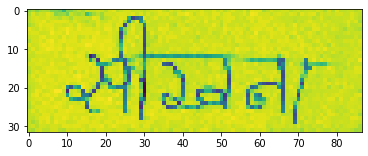

In [151]:
plt.imshow(curr_img)

In [159]:
vocab = None

with open(os.path.join(DATA_ROOT_PATH, "hindi_vocab.txt"),encoding="utf-8") as f:
  vocab = f.readlines()

idx_to_vocab = {i:value.strip() for i, value in enumerate(vocab)}
vocab_to_idx = {value:key for key, value in idx_to_vocab.items()}

In [4]:
train_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_train.txt"), encoding="utf-8") as f:
  train_data = f.readlines()

In [5]:
valid_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  valid_data = f.readlines()

In [6]:
test_data = None

with open(os.path.join(DATA_ROOT_PATH, "new_val.txt"), encoding="utf-8") as f:
  test_data = f.readlines()

In [7]:
charl = None

with open( "charList.txt", encoding="utf-8") as f:
  charl = f.readlines()

In [8]:
charl=charl[0]

In [93]:
charl[54]

'श'

In [72]:
len(test_data)

12713

In [ ]:
len(vocab)

In [ ]:
m=0
for i in range(len(vocab)):
    s=idx_to_vocab[i]
    m=max(m,len(s))
m

In [ ]:
len(train_data)

In [ ]:
train_data=train_data[:30000]

In [ ]:
#not needed
len(d)

In [ ]:
#not needed
d=[]
path_to_label={}
for i in range(len(train_data)):
    label=train_data[i].split()
    curr_img_path = label[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        d.append(curr_img_path)
        path_to_label[curr_img_path]=int(label[1])

# train data labels

In [ ]:
#not needed
train_data_labels=[]
for i in range(len(train_data)):
    z=[]
    for j in range(27):
        z.append(0)
    
    label=train_data[i].split()
    curr_img_path = label[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        label=idx_to_vocab[int(label[1])]
        for k in range(len(label)):
            for r in range(len(charl)):
                if label[k]==charl[r]:
                    z[k]=r
        train_data_labels.append(z)

In [ ]:
#not needed
len(train_data_labels)

In [ ]:
#not needed
train_data_labels[0]

# train data generation

In [ ]:
#not needed
curr_img_path = curr_data[0]
curr_label = vocab_to_idx[curr_data[1]]

curr_img_path = "\\".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

In [21]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im
from scipy.ndimage import interpolation as inter

def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score
def skew_c(input_file):
    img = im.open(input_file)
    # convert to binary
    wd, ht = img.size
    pix = np.array(img.convert('1').getdata(), np.uint8)
    bin_img = 1 - (pix.reshape((ht, wd)) / 255.0)
    plt.imshow(bin_img, cmap='gray')
    #plt.savefig('binary.png')
    delta = 1
    limit = 5
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = find_score(bin_img, angle)
        scores.append(score)
    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    #print('Best angle: {}'.formate(best_angle))
    # correct skew
    data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
    img = im.fromarray((255 * data).astype("uint8")).convert("RGB")
    return img

In [9]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

In [ ]:
#not needed
t_data=[]
for i in range(len(train_data)):
    curr_data=train_data[i].split()
    curr_img_path = curr_data[0]
    curr_img_path = "\\".join(curr_img_path.split("/")[2:])
    curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)
    if os.path.exists(curr_img_path):
        curr_img=skew_c(curr_img_path)
        curr_img = ImageOps.grayscale(curr_img)
        curr_img = pp.preprocess(curr_img_path,IMG_SIZE )
        t_data.append(curr_img)

In [10]:

##label generator
def label_g(l):
    label=idx_to_vocab[l]
    z=[]
    for j in range(27):
        z.append(0)
    for k in range(len(label)):
        for r in range(len(charl)):
            if label[k]==charl[r]:
                z[k]=r
    return z   

In [114]:

##label generator
def label_g1(l):
    label=idx_to_vocab[l]
    z=[]
    for k in range(len(label)):
        for r in range(len(charl)):
            if label[k]==charl[r]:
                z.append(r)
    return z   

In [ ]:
#not needed
def preprocess1(curr_img_path):
    img=tf.io.read_file(curr_img_path)
    path=os.path.abspath(img)
    print(path)
    curr_img=skew_c(img)
    curr_img = ImageOps.grayscale(curr_img)
    curr_img = pp.preprocess(curr_img_path,IMG_SIZE )
    plt.imshow(curr_img, cmap='gray')
    
    #label=label_g(path_to_label[curr_img_path])
    return curr_img

In [ ]:
s=np.zeros((8, 27))
s

In [11]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

class DataGen(tf.keras.utils.Sequence):
    def __init__(self, data, img_size, batch_size, mode="TRAIN"):
        self.data = data
        self.img_size = img_size
        self.batch_size = batch_size
        self.mode = mode
        
    def __getitem__(self, i):
        start = i * self.batch_size
        end = (i+1) * self.batch_size
        batch_images = np.zeros((self.batch_size, self.img_size[0], self.img_size[1], 1))
        batch_labels = np.zeros((self.batch_size, 27))
        #batch_labels =[[],[],[],[],[],[],[],[]]
        
        for ii, df_index in enumerate(range(start, end)):
            curr_data = self.data[ii].split()
            curr_img_path = curr_data[0]
            #curr_label = idx_to_vocab[int(curr_data[1])]
            curr_label = label_g(int(curr_data[1]))

            curr_img_path = "/".join(curr_img_path.split("/")[2:])
            curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

            curr_img = Image.open(curr_img_path)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #curr_img = skew_c(curr_img_path)
            curr_img = ImageOps.grayscale(curr_img)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #delta_width = self.img_size[1] - curr_img.width
            #delta_height = self.img_size[0] - curr_img.height
            #pad_width = delta_width // 2
            #pad_height = delta_height // 2
            #padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
            #curr_img = ImageOps.expand(curr_img, padding)
            
            curr_img = img_to_array(curr_img)
            img_shape = curr_img.shape
            curr_img = pp1.preprocess(curr_img_path, self.img_size)
            curr_img=cv2.adaptiveThreshold(curr_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #curr_img = curr_img.numpy().reshape((self.img_size[0], self.img_size[1],1))
            batch_images[ii, :, :,0] = curr_img 
            batch_labels[ii,:] = curr_label
                    
        if self.mode == "TRAIN":
          return batch_images, batch_labels
        else:
          return batch_images
        
    def __len__(self):
      return len(self.data) // self.batch_size

In [115]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from PIL import Image, ImageOps
from data import preproc as pp

class DataGen1(tf.keras.utils.Sequence):
    def __init__(self, data, img_size, batch_size, mode="TRAIN"):
        self.data = data
        self.img_size = img_size
        self.batch_size = batch_size
        self.mode = mode
        
    def __getitem__(self, i):
        start = i * self.batch_size
        end = (i+1) * self.batch_size
        batch_images = np.zeros((self.batch_size, self.img_size[0], self.img_size[1], 1))
        batch_labels = np.zeros((self.batch_size, 27))
        #batch_labels =[[],[],[],[],[],[],[],[]]
        
        for ii, df_index in enumerate(range(start, end)):
            curr_data = self.data[ii].split()
            curr_img_path = curr_data[0]
            #curr_label = idx_to_vocab[int(curr_data[1])]
            curr_label = label_g1(int(curr_data[1]))

            curr_img_path = "/".join(curr_img_path.split("/")[2:])
            curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

            curr_img = Image.open(curr_img_path)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #curr_img = skew_c(curr_img_path)
            curr_img = ImageOps.grayscale(curr_img)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #delta_width = self.img_size[1] - curr_img.width
            #delta_height = self.img_size[0] - curr_img.height
            #pad_width = delta_width // 2
            #pad_height = delta_height // 2
            #padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
            #curr_img = ImageOps.expand(curr_img, padding)
            
            curr_img = img_to_array(curr_img)
            img_shape = curr_img.shape
            curr_img = pp.preprocess(curr_img_path, self.img_size)
            #curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
            #curr_img = curr_img.numpy().reshape((self.img_size[0], self.img_size[1],1))
            batch_images[ii, :, :,0] = curr_img 
            batch_labels[ii,:] = curr_label
                    
        if self.mode == "TRAIN":
          return batch_images, batch_labels
        else:
          return batch_images
        
    def __len__(self):
      return len(self.data) // self.batch_size

In [12]:
train_datagen = DataGen(train_data, IMG_SIZE, 8)

In [118]:
test_datagen = DataGen(test_data, IMG_SIZE, 10000)

# model


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.constraints import MaxNorm

from network.layers import FullGatedConv2D, GatedConv2D, OctConv2D
from tensorflow.keras.layers import Conv2D, Bidirectional, LSTM, GRU, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, PReLU
from tensorflow.keras.layers import Input, Add, Activation, Lambda, MaxPooling2D, Reshape

In [15]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=ARCH,
                 input_size=IMG_SIZE,
                 vocab_size=110,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15,
                 reduce_factor=0.1)

model.compile(learning_rate=0.001)

In [16]:
model.fit(x=train_datagen,
              epochs=EPOCHS,
              verbose=1)

Epoch 1/100


2023-04-11 16:33:01.764259: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-04-11 16:33:03.023514: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8400
2023-04-11 16:33:03.509525: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-04-11 16:33:03.790027: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f80b368bbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-11 16:33:03.790046: I tensorflow/compiler/xla/servi

2023-04-11 16:33:05.685835: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-04-11 16:33:06.021583: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-04-11 16:33:06.187697: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-addr

8725/8725 [==============================] - 711s 80ms/step - loss: 1.4069
Epoch 2/100
8725/8725 [==============================] - 702s 80ms/step - loss: 9.4220e-04
Epoch 3/100
8725/8725 [==============================] - 700s 80ms/step - loss: 2.2053e-04
Epoch 4/100
8725/8725 [==============================] - 702s 80ms/step - loss: 3.6818e-04
Epoch 5/100
8725/8725 [==============================] - 701s 80ms/step - loss: 2.5295e-04
Epoch 6/100
8725/8725 [==============================] - 701s 80ms/step - loss: 1.8604e-04
Epoch 7/100
8725/8725 [==============================] - 700s 80ms/step - loss: 2.0390e-04
Epoch 8/100
8725/8725 [==============================] - 701s 80ms/step - loss: 1.8401e-04
Epoch 9/100
8725/8725 [==============================] - 699s 80ms/step - loss: 2.1060e-04
Epoch 10/100
8725/8725 [==============================] - 701s 80ms/step - loss: 1.8292e-04
Epoch 11/100
8725/8725 [==============================] - 700s 80ms/step - loss: 1.8158e-04
Epoch 12/100


In [237]:
import joblib

In [238]:
joblib.dump(model,'c1model.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_1
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_2
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_3
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_4
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_5
.........vars
............0
............1
............2
............3
............4
............5
............6
......bidirectional
.........backward_layer
............cell
...............vars
.....

['c1model.pkl']

In [240]:
ner=joblib.load('c1model.pkl')

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-04-14 16:09:58           64
variables.h5                                   2023-04-14 16:09:58      2695880
config.json                                    2023-04-14 16:09:58        18567


ValueError: Unknown layer: 'FullGatedConv2D'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [227]:
import pickle


In [228]:
f="c1model.sav"

In [229]:
pickle.dump(model,open(f,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_1
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_2
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_3
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_4
.........vars
............0
............1
............2
............3
............4
............5
............6
......batch_normalization_5
.........vars
............0
............1
............2
............3
............4
............5
............6
......bidirectional
.........backward_layer
............cell
...............vars
.....

In [236]:
lm=pickle.loads(f)

TypeError: a bytes-like object is required, not 'str'

In [234]:
lm.predict(curr_img1)

NameError: name 'lm' is not defined

In [220]:
path="..//output//wights"

In [221]:
model.save_weights(path)

AttributeError: 'HTRModel' object has no attribute 'save_weights'

In [233]:
curr_img1.shape

(1, 128, 32)

In [61]:
curr_img1 = np.expand_dims(curr_img, 0)

In [62]:
model.predict(curr_img1)

([array([[56, 61, 62, 21,  3, 23]])], [array([0.32158688], dtype=float32)])

In [63]:
print(charl[56])
print(charl[61])
print(charl[62])
print(charl[21])
print(charl[3])
print(charl[23])

स
ि
ी
क
ं
ग


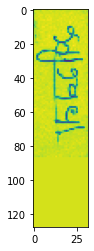

In [64]:
plt.imshow(curr_img)

In [26]:
print(charl[57])
print(charl[60])
print(charl[3])
print(charl[23])
print(charl[21])
print(charl[60])
print(charl[3])
print(charl[23])

ह
ा
ं
ग
क
ा
ं
ग


In [117]:
xt=test_datagen[0][0]
yt=test_datagen[0][1]

ValueError: could not broadcast input array from shape (6,) into shape (27,)

In [84]:
predicts, _ = model.predict(x=xt,
                            ctc_decode=True,
                            verbose=1)

Model Predict
1/1 [==============================] - 2s 2s/step
CTC Decode
1/1 [==============================] - 84s 84s/step


In [96]:
len(predicts[0])

1

In [100]:
predicts[1][0]

[26, 61, 50, 74, 21, 60]

In [101]:
def convert(predicts):
    a=[]
    b=[]
    for i in range(len(predicts)):
        b=[]
        for j in range(len(predicts[i][0])):
            b.append(charl[predicts[i][0][j]])
        a.append(b)
    return a

In [132]:
def convert1(predicts):
    a=[]
    b=[]
    for i in range(len(predicts)):
        b=[]
        for j in range(len(predicts[i])):
            b.append(charl[int(predicts[i][j])])
        a.append(b)
    return a

In [122]:
def trim(yt):
    yt1=[]
    for i in range(len(yt)):
        k=0
        for j in range(26,0,-1):
            if yt[i][j]!=0:
                yt1.append(yt[i][0:j+1])
                k=1
                break
        if k==0:
            yt1.append([0])
    return yt1

In [123]:
yt1=trim(yt)

In [126]:
len(yt1[0])

6

In [125]:
len(yt[0])

27

In [131]:
yt1[0][1]

60.0

In [102]:
predicts1=convert(predicts)

In [133]:
gt=convert1(yt1)

In [139]:
from data import evaluation

In [145]:

import string
import unicodedata
import editdistance
import numpy as np


def ocr_metrics(predicts, ground_truth, norm_accentuation=False, norm_punctuation=False):
    """Calculate Character Error Rate (CER), Word Error Rate (WER) and Sequence Error Rate (SER)"""

    if len(predicts) == 0 or len(ground_truth) == 0:
        return (1, 1, 1)

    cer, wer, ser = [], [], []

    for (pd, gt) in zip(predicts, ground_truth):
        '''pd, gt = pd.lower(), gt.lower()

        if norm_accentuation:
            pd = unicodedata.normalize("NFKD", pd).encode("ASCII", "ignore").decode("ASCII")
            gt = unicodedata.normalize("NFKD", gt).encode("ASCII", "ignore").decode("ASCII")

        if norm_punctuation:
            pd = pd.translate(str.maketrans("", "", string.punctuation))
            gt = gt.translate(str.maketrans("", "", string.punctuation))
	'''
        pd_cer, gt_cer = list(pd), list(gt)
        dist = editdistance.eval(pd_cer, gt_cer)
        cer.append(dist / (max(len(pd_cer), len(gt_cer))))

        pd_wer, gt_wer = pd, gt
        dist = editdistance.eval(pd_wer, gt_wer)
        wer.append(dist / (max(len(pd_wer), len(gt_wer))))
        '''
        pd_ser, gt_ser = [pd], [gt]
        dist = editdistance.eval(pd_ser, gt_ser)
        ser.append(dist / (max(len(pd_ser), len(gt_ser))))
        '''
    metrics = [cer, wer]
    metrics = np.mean(metrics, axis=1)

    return metrics

In [146]:
evaluate = ocr_metrics(predicts=predicts1,
                                  ground_truth=gt,)
 
print("Calculate Character Error Rate {}, Word Error Rate {} ".format(evaluate[0],evaluate[1]))

Calculate Character Error Rate 0.914447951099767, Word Error Rate 0.914447951099767 


In [104]:
predicts1[0]

['व', 'न', 'क', 'ि', 'ा']

In [82]:
test_datagen[0][1]

array([[56., 60., 46., ...,  0.,  0.,  0.],
       [21., 68., 44., ...,  0.,  0.,  0.],
       [ 6., 50., 72., ...,  0.,  0.,  0.],
       ...,
       [22., 62.,  3., ...,  0.,  0.,  0.],
       [26., 61., 50., ...,  0.,  0.,  0.],
       [57., 63.,  8., ...,  0.,  0.,  0.]])

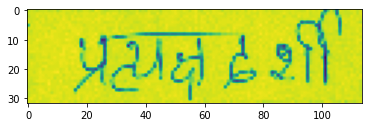

In [217]:
plt.imshow(curr_img)

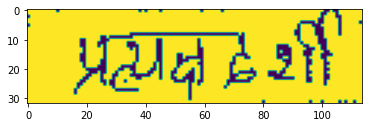

In [218]:
plt.imshow(thresh1)

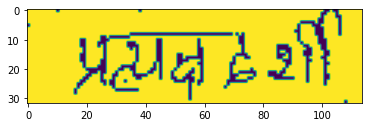

In [219]:
plt.imshow(thresh2)

In [49]:
curr_img

array([[218, 223, 220, ..., 224, 228, 218],
       [221, 222, 220, ..., 224, 226, 223],
       [223, 225, 226, ..., 221, 227, 225],
       ...,
       [220, 220, 220, ..., 220, 220, 220],
       [220, 220, 220, ..., 220, 220, 220],
       [220, 220, 220, ..., 220, 220, 220]], dtype=uint8)

In [210]:
curr_data = test_data[56].split()
curr_img_path = curr_data[0]


curr_img_path = "/".join(curr_img_path.split("/")[2:])
curr_img_path = os.path.join(IMAGES_PATH, curr_img_path)

curr_img = Image.open(curr_img_path)
#curr_img = tf.image.resize(curr_img, (self.img_size[0], self.img_size[1]), method="nearest")
#curr_img = skew_c(curr_img_path)
curr_img = ImageOps.grayscale(curr_img)

curr_img = img_to_array(curr_img)
img_shape = curr_img.shape
#curr_img = tf.image.resize(curr_img, (IMG_SIZE[0], IMG_SIZE[1]), method="nearest")
#curr_img = curr_img.numpy().reshape((IMG_SIZE[0], IMG_SIZE[1],1))
curr_img = pp1.preprocess(curr_img_path, IMG_SIZE)

In [216]:
thresh1 = cv2.adaptiveThreshold(curr_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 199, 5)
thresh2 = cv2.adaptiveThreshold(curr_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 199, 5)

In [212]:
import cv2

# charlist generation


In [197]:
chart=[]

In [198]:
for i in range(len(charl)):
    chart.append(charl[i])

In [199]:
chart[0]

' '

In [200]:
for i in range(len(vocab)):
    for j in range(len(vocab[i])):
        if vocab[i][j] not in chart and vocab[i][j] != '\n':
            chart.append(vocab[i][j])

In [201]:
len(chart)

113

In [194]:
len(charl)

109

In [196]:
chart

[' ',
 '-',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऌ',
 'ऍ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ऒ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'ऩ',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ऱ',
 'ल',
 'ळ',
 'ऴ',
 'व',
 'श',
 'ष',
 'स',
 'ह',
 '़',
 'ऽ',
 'ा',
 'ि',
 'ी',
 'ु',
 'ू',
 'ृ',
 'ॄ',
 'ॅ',
 'े',
 'ै',
 'ॉ',
 'ॊ',
 'ो',
 'ौ',
 '्',
 'ॐ',
 '॑',
 '॒',
 '॓',
 '॔',
 'क़',
 'ख़',
 'ग़',
 'ज़',
 'ड़',
 'ढ़',
 'फ़',
 'य़',
 'ॠ',
 'ॢ',
 '।',
 '॥',
 '०',
 '१',
 '२',
 '३',
 '४',
 '५',
 '६',
 '७',
 '८',
 '९',
 '॰',
 'ॱ',
 'ॲ',
 'ॻ',
 'ॼ',
 'ॽ',
 'ॾ',
 '\n',
 'ॆ',
 'ॿ',
 'ॡ',
 'ऄ',
 ' ',
 '-',
 'ँ',
 'ं',
 'ः',
 'अ',
 'आ',
 'इ',
 'ई',
 'उ',
 'ऊ',
 'ऋ',
 'ऌ',
 'ऍ',
 'ऎ',
 'ए',
 'ऐ',
 'ऑ',
 'ऒ',
 'ओ',
 'औ',
 'क',
 'ख',
 'ग',
 'घ',
 'ङ',
 'च',
 'छ',
 'ज',
 'झ',
 'ञ',
 'ट',
 'ठ',
 'ड',
 'ढ',
 'ण',
 'त',
 'थ',
 'द',
 'ध',
 'न',
 'ऩ',
 'प',
 'फ',
 'ब',
 'भ',
 'म',
 'य',
 'र',
 'ऱ',
 'ल',
 'ळ',
 'ऴ

In [209]:
chart[109:]

['ॆ', 'ॿ', 'ॡ', 'ऄ']

In [ ]:
ch

In [205]:
test_data[56]

'HindiSeg/val/3/67/22.jpg 3870\n'

In [206]:
d=idx_to_vocab[3870]

In [207]:
d

'प्रत्यक्षदर्शी'

In [208]:

for i in d:
    

प
्
र
त
्
य
क
्
ष
द
र
्
श
ी


In [170]:
from data import preproc1 as pp1

In [171]:
from keras.models import Sequential

In [ ]:

model=Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer="he_uniform",input_shape=(1024, 128, 1)))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(Conv2D(filters=40, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=40, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=48, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=56, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(FullGatedConv2D(filters=56, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2])))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform"))
model.add(PReLU(shared_axes=[1, 2]))
model.add(BatchNormalization(renorm=True))
model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2), padding="valid"))
shape = model.output_shape
model.add(Reshape((shape[1], shape[2] * shape[3])))
model.add(Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5)))
model.add(Dense(units=256))
model.add(Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5)))
model.add( Dense(units=110+1, activation="softmax"))




In [ ]:
model.output_shape

In [ ]:

def flor(input_size, d_model):
    """
    Gated Convolucional Recurrent Neural Network by Flor et al.
    """

    input_data = Input(name="input", shape=input_size)

    cnn = Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), padding="same", kernel_initializer="he_uniform")(input_data)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=16, kernel_size=(3, 3), padding="same")(cnn)

    cnn = Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=32, kernel_size=(3, 3), padding="same")(cnn)

    cnn = Conv2D(filters=40, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=40, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=48, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=48, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=56, kernel_size=(2, 4), strides=(2, 4), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)
    cnn = FullGatedConv2D(filters=56, kernel_size=(3, 3), padding="same", kernel_constraint=MaxNorm(4, [0, 1, 2]))(cnn)
    cnn = Dropout(rate=0.2)(cnn)

    cnn = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding="same", kernel_initializer="he_uniform")(cnn)
    cnn = PReLU(shared_axes=[1, 2])(cnn)
    cnn = BatchNormalization(renorm=True)(cnn)

    cnn = MaxPooling2D(pool_size=(1, 2), strides=(1, 2), padding="valid")(cnn)

    shape = cnn.get_shape()
    bgru = Reshape((shape[1], shape[2] * shape[3]))(cnn)

    bgru = Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5))(bgru)
    bgru = Dense(units=256)(bgru)

    bgru = Bidirectional(GRU(units=128, return_sequences=True, dropout=0.5))(bgru)
    output_data = Dense(units=d_model+1, activation="softmax")(bgru)

    return (input_data, output_data)

In [ ]:
model=flor(IMG_SIZE,110)

In [ ]:
model

In [ ]:
model=sequential

In [ ]:
model.compile(loss=ctc_loss_lambda_func)

In [ ]:
model.fit(train_datagen, epochs=10, batch_size=8)

In [ ]:
#not needed
ctc_l=tf.nn.ctc_loss(
    tf.zeros((16,50),),
    sequence_length,
    preprocess_collapse_repeated=False,
    ctc_merge_repeated=True,
    ignore_longer_outputs_than_inputs=False,
    time_major=True
)

In [ ]:
#not needed
lossc=tf.nn.ctc_loss()